### **Studi Kasus**

### 📄 Informasi Dataset

Sebuah tim data science Daspro sedang mengembangkan sistem prediksi untuk membantu tenaga medis mengenali risiko stroke pada pasien berdasarkan data klinis dan demografis. Dataset yang digunakan berisi informasi seperti:

1. **age** : Umur pasien
2. **gender** : Jenis kelamin
3. **hypertension** : Riwayat hipertensi dan penyakit jantung
4. **ever_married** : Status pernikahan
5. **work_type** : Jenis pekerjaan
6. **Residence_type** : tempat tinggal
7. **avg_glucose_level** : Level glukosa rata-rata
8. **bmi** : BMI (Body Mass Index)
9. **smoking_status** : Status merokok

Tim memutuskan menggunakan algoritma Naive Bayes untuk membangun model klasifikasi yang dapat memprediksi apakah seorang pasien berisiko terkena stroke atau tidak.

Setelah model selesai dibuat dan dievaluasi, tim juga membangun dashboard interaktif menggunakan Streamlit agar pengguna dapat:
* Memasukkan data pasien baru untuk mendapatkan prediksi secara langsung.
* Melihat visualisasi data dan performa model.

---

#### **Dataset**

1. **id**               : ID Pasien
2. **gender**           : jenis kelamin pasien
- 0: Female
- 1: Male
3. **age**              : usia pasien
4. **hypertension**     : riwayat penyakin hipertensi
- 0: memiliki riwayat
- 1: tidak memiliki riwayat
5. **heart_disease**    : riwayat penyakit jantung
- 0: memiliki riwayat
- 1: tidak memiliki riwayat
6. **ever_married**     : status pernikahan
- 0: No
- 1: Yes
7. **work_type**        : tipe pekerjaan
- 0: Govt_job
- 1: Never_worked
- 2: Private
- 3: Self-employed
- 4: Children
8. **Residence_type**   : tempat tinggal
- 0: Rural
- 1: Urban
9. **avg_glucose_level** : level glukosa rata-rata
10. **bmi** : BMI (Body Mass Index)
11. **smoking_status**  : status merokok
- 0: Unknown
- 1: Formerly smoked
- 2: Never smoked
- 3: smokes
12. **stroke** : Label Data

---

#### **Data Understanding**

Pertama, kita akan membaca dan melihat ringkasan statistik dari dataset menggunakan pandas dan menampilkan beberapa baris awal untuk memahami struktur data.

**Hint: library pandas, menggunkan `read_csv()`, `head()`, `describe()`**

In [1]:
import pandas as pd

df = pd.read_csv('dataset_StrokePredicton.csv')
df.head()
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,36605.005248,0.410449,40.893762,0.074378,0.039243,0.622861,2.201916,0.507643,91.476126,27.770010,1.344285,0.037417
std,21166.169103,0.492435,22.565008,0.262415,0.194194,0.484725,1.110744,0.499999,22.663253,6.521408,1.084882,0.189804
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17864.500000,0.000000,23.000000,0.000000,0.000000,0.000000,2.000000,0.000000,75.075000,23.200000,0.000000,0.000000
50%,36969.000000,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,1.000000,88.040000,27.600000,2.000000,0.000000
75%,54870.000000,1.000000,58.000000,0.000000,0.000000,1.000000,3.000000,1.000000,104.025000,31.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,168.680000,45.500000,3.000000,1.000000


Lihat ringkasan statistik dari dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4383 non-null   int64  
 1   gender             4383 non-null   int64  
 2   age                4383 non-null   float64
 3   hypertension       4383 non-null   int64  
 4   heart_disease      4383 non-null   int64  
 5   ever_married       4383 non-null   int64  
 6   work_type          4383 non-null   int64  
 7   Residence_type     4383 non-null   int64  
 8   avg_glucose_level  4383 non-null   float64
 9   bmi                4383 non-null   float64
 10  smoking_status     4383 non-null   int64  
 11  stroke             4383 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 411.0 KB


#### **Pre-Modeling**

##### **Data Balancing**

Lakukan balancing data pada label target yaitu **stroke**, untuk mengecek apakah data terdistribusi dengan merata atau tidak

**Hint: `value_counts()`**

In [3]:
print("\n=== Distribusi Awal Label 'stroke' ===")
print(df['stroke'].value_counts())


=== Distribusi Awal Label 'stroke' ===
stroke
0    4219
1     164
Name: count, dtype: int64


##### **Random UnderSampling**

Pisahkan kelas mayoritas dan minoritas

**Hint: mayoritas = 0, minoritas = 1**

In [4]:
mayoritas = df[df['stroke'] == 0]
minoritas = df[df['stroke'] == 1]

Melakukan Random Undersampling

**Hint: random_state = 42**

In [5]:
mayoritas_undersampled = mayoritas.sample(n=len(minoritas), random_state=42)

Gabungkan kembali kelas mayoritas yang sudah di undersampling dengan kelas minoritas

**Hint: `concat()`**

In [6]:
df_balanced = pd.concat([mayoritas_undersampled, minoritas])

Cek kembali hasil distribusinya

**Hint: `value_counts()`**

In [7]:
print("\nDistribusi data setelah balancing:")
print(df_balanced['stroke'].value_counts())


Distribusi data setelah balancing:
stroke
0    164
1    164
Name: count, dtype: int64


#### **Build Model**

Import semua library yang diperlukan untuk:
* Membangun model klasifikasi **Naive Bayes**
* **Membagi dataset** menjadi data latih dan data uji
* **Mengevaluasi performa model** (akurasi, precision, recall, dll)



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Legion\AppData\Roaming\Python\Python311\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


**Pilih fitur** yang akan jadikan target (**stroke**)

Pisahkan dataset menjadi 2 :
* X ( independent variable )
* y ( dependent variable )

In [9]:
X = df_balanced.drop(columns=['id', 'stroke'])
y = df_balanced['stroke']

Split dataset untuk training dan testing, atur **size data uji sebanyak 20%**

**Hint: function train_test_split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Latih model Naive Bayes

**Hint: `GaussianNB()`, `fit()`**

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Buat prediksi dari model yang sudah dilatih

**Hint: `predict()`**

In [12]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#### **Evaluasi Model**

Tampilkan hasil akurasi hasil **prediksi model**

**Hint: `accuracy_score()`**

In [13]:
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))

=== Accuracy Score ===
0.6666666666666666


Tampilkan hasil **confusion matrix** hasil prediksi model

**Hint: `confusion_matrix()`**

In [14]:
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Confusion Matrix ===
[[23 11]
 [11 21]]


Menampilkan classification report hasil prediksi model

**Hint: `classification_report()`**

In [15]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        34
           1       0.66      0.66      0.66        32

    accuracy                           0.67        66
   macro avg       0.67      0.67      0.67        66
weighted avg       0.67      0.67      0.67        66



Import library yang akan digunakan untuk melakuka evaluasi model menggunakan ROC

**Hint: sklearn.metrics (roc_curve,roc_auc_score, auc) dan Matplotlib**

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

Membuat probabilitas prediksi

**Hint: `predict_proba()`**

In [17]:
y_probs = model.predict_proba(X_test)[:, 1]

Hitung kurva ROC dan threshold

**Hint: `roc_curve()`**

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

Hitung AUC

**Hint: `auc()`**

In [19]:
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.796875


Untuk lebih memudahkan pembacaan hasil, buat visualisasi dari ROC-AUC

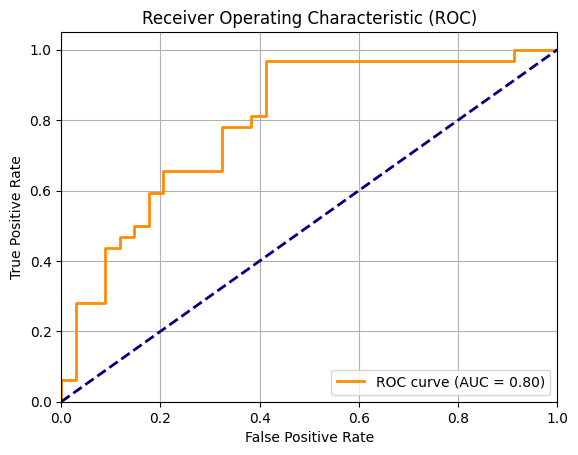

In [20]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### **Model Tuning**

Untuk memperoleh evaluasi performa model yang lebih stabil dan dapat digeneralisasi, lakukan evaluasi ulang menggunakan **metode 5-Fold Cross Validation** dengan metrik ROC AUC. Tampilkan hasil skor setiap fold dan rata-rata dari skor tersebut.

**Hint: cross_val_score() dari sklearn.model_selection**

**Contoh parameter : cv = 5, scoring = roc_auc**

Lakukan import library **cross_val_score, cross_val_predict**

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Latih model

**Hint: `GaussianNB()`, `cross_val_score()`**

In [22]:
model = GaussianNB()

# ROC AUC scores dari cross validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

In [23]:
print("ROC AUC per fold:", cv_scores)
print("Average ROC AUC:", cv_scores.mean())

ROC AUC per fold: [0.87419651 0.82828283 0.87786961 0.80208333 0.81344697]
Average ROC AUC: 0.8391758494031223


Tampilkan Akurasi Scorenya

**Hint: `cross_val_predict()`**

In [24]:
y_pred = cross_val_predict(model, X, y, cv=5)

Tampilkan hasil Confusion Matrix

**Hint: `confusion_matrix()`**

In [25]:
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[136  28]
 [ 60 104]]


Menampilkan classification report hasil prediksi model

**Hint: `classification_report()`**

In [26]:
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.76       164
           1       0.79      0.63      0.70       164

    accuracy                           0.73       328
   macro avg       0.74      0.73      0.73       328
weighted avg       0.74      0.73      0.73       328



Tampilkan score ROC AUC dan score dari rata-rata dari 5 kali uji performa model

In [27]:
model = GaussianNB()
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

for i, score in enumerate(roc_auc_scores, 1):
    print(f"Fold {i} ROC AUC Score: {score:.4f}")

print(f"\nRata-rata ROC AUC Score: {roc_auc_scores.mean():.4f}")

Fold 1 ROC AUC Score: 0.8742
Fold 2 ROC AUC Score: 0.8283
Fold 3 ROC AUC Score: 0.8779
Fold 4 ROC AUC Score: 0.8021
Fold 5 ROC AUC Score: 0.8134

Rata-rata ROC AUC Score: 0.8392


### **Deployment**

Save Model

**Hint: `joblib`**

In [37]:
import joblib

model = GaussianNB()
model.fit(X, y)

# Simpan model yang sudah dilatih
joblib.dump(model, 'model_stroke.pkl')

['model_stroke.pkl']

Install Ngrok 

In [29]:
!pip install pyngrok

Konfigurasikan token

Contoh : !ngrok config add-authtoken **_token kamu_**

In [ ]:
!ngrok config add-authtoken /path/to/your/ngrok/authtoken

Authtoken saved to configuration file: C:\Users\Legion\AppData\Local/ngrok/ngrok.yml


Install Streamlit

In [31]:
!pip install streamlit

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

#
#1. Load Model yang sudah dilatih sebelumnya
#
model = joblib.load('model_stroke.pkl')

# Judul

st.set_page_config(
    page_title="Dashboard Prediksi Risiko Stroke",
    page_icon="🧠",
)
st.title(" TP Modul 3 - Stroke Prediction App")
st.write("Masukkan data pasien untuk memprediksi kemungkinan terkena stroke.")

st.markdown("---")
st.subheader("Evaluasi Model")

#
#2. Load dan persiapkan data sama seperti saat melatih model sebelumnya
#
data = pd.read_csv('dataset_StrokePredicton.csv')

#
# 2.1 Drop Column yang tidak diperlukan
#
data = data.drop(columns=['id'], errors='ignore')


# Mengurangi jumlah data kelas mayoritas agar sesuai dengan jumlah kelas minoritas
data = pd.concat([
    data[data['stroke'] == 0].sample(n=data[data['stroke'] == 1].shape[0], random_state=42),
    data[data['stroke'] == 1]
])

#
# 2.2 Pisahkan data menjadi fitur dan target
#
X = data.drop(columns=['stroke'])
y = data['stroke']

#
# 2.3 Buat prediksi menggunakan model yang sudah dilatih 
# Hint : ( y_pred dan y_prob )
#
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]


#
# 2.4 Hitung metrik evaluasi
# Hint : ( accuracy_score, precision_score, recall_score, f1_score, roc_auc_score )
#
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_prob)


# Tampilkan metrik evaluasi
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.success(f"Accuracy: **{acc:.2f}**")

with col2:
    st.info(f"Precision: **{prec:.2f}**")

with col3:
    st.warning(f"Recall: **{rec:.2f}**")

with col4:
    st.error(f"ROC AUC: **{roc_auc:.2f}**")
    

# Plot options
plot_option = st.selectbox("Pilih grafik untuk ditampilkan:",["Pilih", "ROC AUC Curve", "Confusion Matrix"])

if plot_option == "ROC AUC Curve":
  st.subheader("ROC Curve")
  fpr, tpr, _ = roc_curve(y, y_prob)
  fig2, ax2 = plt.subplots()
  ax2.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
  ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')
  ax2.set_xlabel('False Positive Rate')
  ax2.set_ylabel('True Positive Rate')
  ax2.set_title('ROC Curve')
  ax2.legend()
  st.pyplot(fig2)

elif plot_option == "Confusion Matrix":
  st.subheader("Confusion Matrix")
  cm = confusion_matrix(y, y_pred)
  fig, ax = plt.subplots()
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  st.pyplot(fig)

st.markdown("---")
st.subheader("Prediksi Risiko Stroke")

# Input form untuk prediksi

#
# 3. Buat form input untuk data prediksi
# Hint : (
#     gender -> options = ["Male","Female"]
#     hypertension -> options = [Ya", "Tidak"]
#     Residence_type -> options = ["Rural (Pedesaan)", "Urban (Perkotaan)"]
# )
#
with st.form("prediction_form"):
    gender = st.selectbox("Jenis Kelamin", options=["Male", "Female"])
    age = st.number_input("Usia", min_value=0.0, max_value=120.0, step=0.1)
    hypertension = st.selectbox("Hipertensi", options=["Ya", "Tidak"])
    heart_disease = st.selectbox("Penyakit Jantung", options=["Ya", "Tidak"])
    ever_married = st.selectbox("Pernah Menikah", options=["Ya", "Tidak"])
    work_type = st.selectbox("Jenis Pekerjaan", options=["Pegawai Negeri", "Belum Pernah Bekerja", "Swasta", "Wiraswasta", "Anak-anak"])
    Residence_type = st.selectbox("Tipe Tempat Tinggal", options=["Rural (Pedesaan)", "Urban (Perkotaan)"])
    avg_glucose = st.number_input("Rata-rata Glukosa", min_value=0.0, step=0.1)
    bmi = st.number_input("BMI", min_value=0.0, step=0.1)
    smoking_status = st.selectbox("Status Merokok", options=["Tidak diketahui", "Pernah Merokok", "Tidak Pernah Merokok", "Masih Merokok"])

    submit = st.form_submit_button("Prediksi")

# fungsi untuk mapping input ke dalam format yang sesuai dengan model
def map_inputs():
    gender_map = {"Female": 0, "Male": 1}
    hypertension_map = {"Ya": 1, "Tidak": 0}
    heart_map = {"Ya": 1, "Tidak": 0}
    married_map = {"Tidak": 0, "Ya": 1}
    residence_map = {"Rural (Pedesaan)": 0, "Urban (Perkotaan)": 1}
    work_map = {"Pegawai Negeri": 0, "Belum Pernah Bekerja": 1, "Swasta": 2, "Wiraswasta": 3, "Anak-anak": 4}
    smoke_map = {"Tidak diketahui": 0, "Pernah Merokok": 1, "Tidak Pernah Merokok": 2, "Masih Merokok": 3}
    
    #
    # 4. Buat dataframe dari input yang sudah dimasukkan
    #

    return pd.DataFrame([{
        "gender": gender_map[gender],
        "age": age,
        "hypertension": hypertension_map[hypertension],
        "heart_disease": heart_map[heart_disease],
        "ever_married": married_map[ever_married],
        "work_type": work_map[work_type],
        "Residence_type": residence_map[Residence_type],
        "avg_glucose_level": avg_glucose,
        "bmi": bmi,
        "smoking_status": smoke_map[smoking_status]
    }])

if submit:
    input_df = map_inputs()
    prob = model.predict_proba(input_df)[0][1]
    pred = model.predict(input_df)[0]

    st.subheader("Hasil Prediksi")
    st.write(f"Pasien diprediksi: **{'Berpotensi Mengalami Stroke' if pred == 1 else 'Berpotensi Tidak Mengalami Stroke'}**")
    st.write(f"Probabilitas stroke: **{prob:.2f}**")

Writing app.py


Ekspos Streamlit local kalian ke public menggunakan Ngrok (Cukup di run sekali)

In [33]:
from pyngrok import ngrok
import threading
import time
import os

In [35]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8502")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8502)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://4cb0-2001-448a-3027-3ea0-572-e8e5-993a-14e.ngrok-free.app" -> "http://localhost:8502"


In [ ]:
#Run on terminal : python -m streamlit run app.py --server.port 8502